In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

C:\Users\wmy\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.
Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.


In [2]:
a = np.random.randn(3, 3)
print(a)

[[ 0.23098833 -1.38783838  1.13684231]
 [ 0.36014113  1.08839117 -0.69980602]
 [ 0.73579382  0.58718295  0.97604822]]


In [4]:
a_tensor = tf.constant(a)
print(a_tensor)
print(a_tensor.dtype)

Tensor("Const_1:0", shape=(3, 3), dtype=float64)
<dtype: 'float64'>


In [6]:
with tf.Session() as sess:
    print(sess.run(a_tensor))

[[ 0.23098833 -1.38783838  1.13684231]
 [ 0.36014113  1.08839117 -0.69980602]
 [ 0.73579382  0.58718295  0.97604822]]


In [7]:
w = tf.Variable(tf.random_normal([2, 3]))
print(w)

<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32_ref>


In [12]:
with tf.Session() as sess:
    try:
        print(sess.run(w))
    except:
        print('error')

error


In [14]:
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    try:
        print(sess.run(w))
    except:
        print('error')

[[-0.19574387 -0.17532395 -0.28150457]
 [ 0.03928045  0.88325596  0.9087141 ]]


In [22]:
tf.reset_default_graph()
w = tf.get_variable(name='w', shape=(2, 3), trainable=True)
print(w)

<tf.Variable 'w:0' shape=(2, 3) dtype=float32_ref>


In [23]:
try:
    w = tf.get_variable(name='w', shape=(2, 3))
except:
    print('error')

error


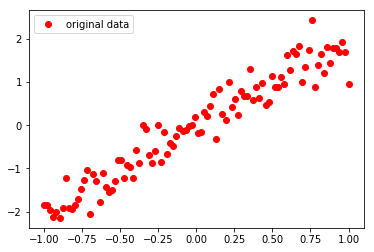

Epoch: 1 cost= 0.24618317 W= [1.4126652] b= [0.13697515]
Epoch: 3 cost= 0.12013608 W= [1.8016573] b= [0.03033774]
Epoch: 5 cost= 0.107283354 W= [1.9068767] b= [-0.00932212]
Epoch: 7 cost= 0.10569341 W= [1.9341621] b= [-0.01978063]
Epoch: 9 cost= 0.105400264 W= [1.9412181] b= [-0.02248818]
Epoch: 11 cost= 0.10533238 W= [1.9430423] b= [-0.02318818]
Epoch: 13 cost= 0.10531536 W= [1.943514] b= [-0.02336925]
Epoch: 15 cost= 0.105311014 W= [1.9436355] b= [-0.02341585]
Epoch: 17 cost= 0.10530987 W= [1.9436675] b= [-0.02342812]
Epoch: 19 cost= 0.10530958 W= [1.9436755] b= [-0.02343122]
Finished
cost= 0.10530952 W= [1.9436768] b= [-0.02343168]


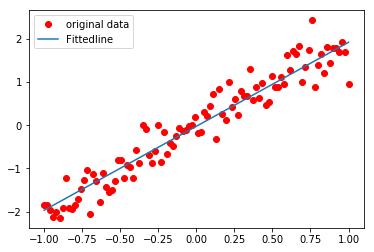

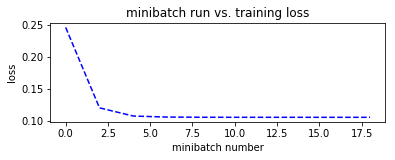

x=0.2, z= [0.3653037]


In [24]:
train_X = np.linspace(-1, 1, 100)
train_Y = 2 * train_X + np.random.randn(*train_X.shape) * 0.3

plt.plot(train_X, train_Y, 'ro', label='original data')
plt.legend()
plt.show()

X = tf.placeholder("float")
Y = tf.placeholder("float")

W = tf.Variable(tf.random_normal([1]), name="weight")
b = tf.Variable(tf.zeros([1]), name="bias")

Z = tf.multiply(X, W) + b

plotdata = {"batchsize":[], "loss":[]}

def moving_average(a,w=10):
    if len(a) < w:
        return a[:]
    return [val if idx < w else sum(a[(idx-w):idx])/w for idx, val in enumerate(a)]

cost = tf.reduce_mean(tf.square(Y - Z))
learning_rate = 0.01
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

init = tf.global_variables_initializer()

num_epochs = 20
display_step = 2

with tf.Session() as sess:
    sess.run(init)
    plotdata = {"batchsize":[], "loss":[]}
    for epoch in range(num_epochs):
        for (x, y) in zip(train_X, train_Y) :
            sess.run(optimizer, feed_dict = {X:x, Y:y})
        if epoch % display_step == 0:
            loss = sess.run(cost, feed_dict={X:train_X, Y:train_Y})
            print("Epoch:", epoch+1, "cost=", loss, \
                  "W=",sess.run(W), "b=", sess.run(b))
            if not (loss == 'NA'):
                plotdata["batchsize"].append(epoch)
                plotdata["loss"].append(loss)
    print('Finished')
    print("cost=", sess.run(cost, feed_dict={X:train_X, Y:train_Y}), \
          "W=",sess.run(W), "b=", sess.run(b))
        
    plt.plot(train_X, train_Y, 'ro', label='original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fittedline')
    plt.legend()
    plt.show()
    
    plotdata["avgloss"]=moving_average(plotdata["loss"])
    plt.figure(1)
    plt.subplot(211)
    plt.plot(plotdata["batchsize"], plotdata["avgloss"], 'b--')
    plt.xlabel('minibatch number')
    plt.ylabel('loss')
    plt.title('minibatch run vs. training loss')
    
    plt.show()    
    
    print("x=0.2, z=", sess.run(Z, feed_dict={X:0.2}))

In [25]:
# 更多细节：https://www.w3cschool.cn/tensorflow_python/